<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Точные-доверительные-интервалы" data-toc-modified-id="Точные-доверительные-интервалы-1">Точные доверительные интервалы</a></span><ul class="toc-item"><li><span><a href="#Д.И.-для-среднего" data-toc-modified-id="Д.И.-для-среднего-1.1">Д.И. для среднего</a></span><ul class="toc-item"><li><span><a href="#Асимптотический-доверительный-интервал" data-toc-modified-id="Асимптотический-доверительный-интервал-1.1.1">Асимптотический доверительный интервал</a></span></li><li><span><a href="#Точный-доверительный-интервал" data-toc-modified-id="Точный-доверительный-интервал-1.1.2">Точный доверительный интервал</a></span></li></ul></li><li><span><a href="#Д.И.-для-разности-средних" data-toc-modified-id="Д.И.-для-разности-средних-1.2">Д.И. для разности средних</a></span><ul class="toc-item"><li><span><a href="#Ассимптотический" data-toc-modified-id="Ассимптотический-1.2.1">Ассимптотический</a></span></li><li><span><a href="#Точный-с-одинаковыми-дисперсиями" data-toc-modified-id="Точный-с-одинаковыми-дисперсиями-1.2.2">Точный с одинаковыми дисперсиями</a></span></li><li><span><a href="#Точный-с-различными-дисперсиями" data-toc-modified-id="Точный-с-различными-дисперсиями-1.2.3">Точный с различными дисперсиями</a></span></li></ul></li><li><span><a href="#Д.И.-для-дисперсии" data-toc-modified-id="Д.И.-для-дисперсии-1.3">Д.И. для дисперсии</a></span></li><li><span><a href="#Д.И.-для-отношения-дисперсий" data-toc-modified-id="Д.И.-для-отношения-дисперсий-1.4">Д.И. для отношения дисперсий</a></span><ul class="toc-item"><li><span><a href="#Причем-тут-единица?" data-toc-modified-id="Причем-тут-единица?-1.4.1">Причем тут единица?</a></span></li></ul></li><li><span><a href="#А-можно-ли-было-пользоваться-нормальным-распределением?" data-toc-modified-id="А-можно-ли-было-пользоваться-нормальным-распределением?-1.5">А можно ли было пользоваться нормальным распределением?</a></span></li></ul></li></ul></div>

#  Точные доверительные интервалы 

Будем работать с данными по стоимости квартир в москве из таблички `flat.csv`.


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

plt.style.use('ggplot')

In [2]:
def norm_conf_int(alpha, mean_hat, std_hat, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """
    
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

__Описание переменных:__

```
n – номер квартиры по порядку
price – цена квартиры в $1000
totsp – общая площадь квартиры, кв.м.
livesp жилая площадь квартиры, кв.м.
kitsp – площадь кухни, кв.м.
dist – расстояние от центра в км.
metrdist – расстояние до метро в минутах
walk – 1 – пешком от метро, 0 – на транспорте
brick 1 – кирпичный, монолит ж/б, 0 – другой
floor 1 – этаж кроме первого и последнего, 0 – иначе.
code – число от 1 до 8, при помощи которого мы группируем наблюдения по
подвыборкам:
1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
3. Северо-запад, вокруг Замоскворецкой линии метрополитена
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена
```


In [3]:
df = pd.read_csv('../data/flat.csv', sep='\t')
print(df.shape)
df.head()

(2040, 11)


,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


## Д.И. для среднего

Построим $95\%$ асимптотический доверительный интервал для средней стоимости квартиры. Построим точный доверительный интервал для средней стоимости квартиры. Какой из них оказался уже? Почему? 

### Асимптотический доверительный интервал

$$
\bar x \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat{\sigma}^2}{n}}.
$$

> __Предположения:__ 
В выборке нет аномалий, собиралась независимо, тогда среднее асимптотически нормально распределено (ЦПТ) 

In [4]:
norm_rv = stats.norm()

In [5]:
norm_rv.rvs(10) # 10 случайных величин

array([-0.01680648,  0.60979877,  0.2060048 , -0.11188518,  0.00264504,
       -0.97282818, -0.1312843 , -0.0652624 ,  1.09819685, -1.14306633])

In [6]:
norm_rv.pdf(4) # функция плотности в некоторой точке

0.00013383022576488537

In [7]:
norm_rv.cdf(1.96) # функция распределения в некоторой точке P(X<a)

0.9750021048517795

In [8]:
norm_rv.ppf(0.975) # квантиль некоторого уровня

1.959963984540054

In [9]:
# вручную 
x = df.price

norm_rv = stats.norm()
alpha = 0.05
z_crit = norm_rv.ppf(1-alpha/2)

mu_hat = x.mean() 
var_hat = x.var(ddof=1) # delta degrees of freedom
n = x.count()

margin = z_crit*(var_hat/n)**0.5

left = mu_hat - margin
right = mu_hat + margin



In [10]:
# format specifier у f-строк
print(f"Доверительный интервал [{left:.1f}; {right:.1f}] ширины {right - left:.3f}")

# # без округления чисел
# print(f"Доверительный интервал [{left}; {right}] ширины {right - left}")

# # без буквы f
# print(f"Доверительный интервал [{left:.5}; {right:.5}] ширины {right - left:.5}")

# # как добавляли переменные в принты до f-строк через .format
# print("Доверительный интервал [{:.1f}; {:.4}] ширины {:.3f}".format(left, right, right - left))

Доверительный интервал [125.2; 129.7] ширины 4.502


In [11]:
def ci_asy(x, alpha=0.05):
    margin = stats.norm().ppf(1-alpha/2) * (x.var(ddof=1)/x.count())**0.5
    return x.mean() - margin, x.mean() + margin

In [12]:
ci_asy(df['price'], alpha=0.05)

(125.24534794254012, 129.74778931236185)

In [13]:
ci_asy(df['totsp'], alpha=0.05)

(72.42804172414964, 73.74058572683074)

In [14]:
# через scipy
mu_hat = x.mean() 
sd_hat = x.std(ddof=1)/np.sqrt(n)

stats.norm.interval(0.95, loc=mu_hat, scale=sd_hat)

(125.24534794254012, 129.74778931236185)

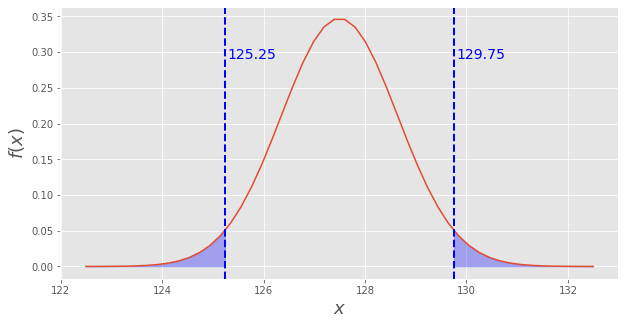

In [15]:
alpha = 0.05
mu_hat = x.mean() 
sd_hat = x.std(ddof=1)/np.sqrt(n)

norm_conf_int(alpha, mu_hat, sd_hat, margin=5);

### Точный доверительный интервал

$$
\bar x \pm t_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat{\sigma}^2}{n}}.
$$

> __Предположения:__ 
Выборка пришла из нормального распределения, дисперсия неизвестна

In [16]:
# вручную 
n = x.count()
t_rv = stats.t(n - 1)

alpha = 0.05
t_crit = t_rv.ppf(1 - alpha/2)

mu_hat = x.mean() 
var_hat = x.var(ddof=1)

margin = t_crit*np.sqrt(var_hat/n)

left = mu_hat - margin
right = mu_hat + margin

print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [125.2; 129.7] ширины 4.505


In [17]:
# Оказался немного шире, но похож, так как:
# t(n) => N(0,1) при n -> inf 
n

2040

In [18]:
# напишемм свою для подсчета доверительных интервалов =)
def ci_asy(x, alpha=0.05, asy=False):
    n = x.count()
    if asy:
        margin = stats.norm().ppf(1-alpha/2) * (x.var(ddof=1)/n)**0.5
    else:
        margin = stats.t(n-1).ppf(1-alpha/2) * (x.var(ddof=1)/n)**0.5
    return x.mean() - margin, x.mean() + margin

In [19]:
# пакетом 
alpha = 0.05
n = x.count()
mu_hat = x.mean()
sd_hat = x.std(ddof=1) / np.sqrt(n)

# тут 0.95 это 1 - alpha
left, right = stats.t.interval(1-alpha, df=(n-1), loc=mu_hat, scale=sd_hat)
print(f"Доверительный интервал [{left:.1f}; {right:.1f}] ширины {right - left:.1f}")


Доверительный интервал [125.2; 129.7] ширины 4.5


> Видим, что интервалы не сильно отличаются друг от друга, из-за того, что у нас в выборке много наблюдений. При большом числе степеней свободы распределение Стьюдента похоже на нормальное. Тем не менее даже при большом количестве наблюдений точный доверительный интервал оказывается немного шире. 

__Построим $99\%$ точные доверительные интервалы для всех районов. В какие из них попало общее среднее? Построим красивую визулизацию.__

In [20]:
df.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [21]:
df['code'].unique()

array([3, 6, 1, 8, 4, 5, 7, 2])

In [22]:
district = [
    'Север, Калужско-Рижская', 
    'Север, Серпуховско-Тимирязевская', 
    'Северо-запад, Замоскворецкая', 
    'Северо-запад, Таганско-Краснопресненская', 
    'Юго-восток, Люблинская', 
    'Юго-восток, Таганско-Краснопресненская',
    'Восток, Калиниская', 
    'Восток, Арбатско-Покровская'
]

In [23]:
df['code'] = df['code'].map(dict(list(enumerate(district, start=1))))
df.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,"Северо-запад, Замоскворецкая"
1,2,75,44,28,6.0,13.5,7,1,0,1,"Юго-восток, Таганско-Краснопресненская"
2,3,128,70,42,6.0,14.5,3,1,1,1,"Северо-запад, Замоскворецкая"
3,4,95,61,37,6.0,13.5,7,1,0,1,"Север, Калужско-Рижская"
4,5,330,104,60,11.0,10.5,7,0,1,1,"Северо-запад, Замоскворецкая"


In [24]:
df_agg = df.groupby('code')['price'].agg(['mean', 'std', 'count'])
df_agg

,mean,std,count
code,,,
"Восток, Арбатско-Покровская",136.744444,48.639263,180
"Восток, Калиниская",114.230088,33.897495,226
"Север, Калужско-Рижская",134.411765,49.619507,272
"Север, Серпуховско-Тимирязевская",110.316279,29.518448,215
"Северо-запад, Замоскворецкая",148.246377,70.573565,345
"Северо-запад, Таганско-Краснопресненская",148.693780,73.656832,209
"Юго-восток, Люблинская",115.779762,31.507483,336
"Юго-восток, Таганско-Краснопресненская",109.964981,32.976595,257


In [25]:
def separate(line):
    return line.split(', ')[1]

separate('Юго-восток, Таганско-Краснопресненская')

'Таганско-Краснопресненская'

In [26]:
separate_v2 = lambda row: row.split(', ')[1]

separate_v2('Юго-восток, Таганско-Краснопресненская')

'Таганско-Краснопресненская'

In [27]:
df['metro_line'] = df['code'].apply(lambda row: row.split(', ')[1])
df.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code,metro_line
0,1,81,58,40,6.0,12.5,7,1,1,1,"Северо-запад, Замоскворецкая",Замоскворецкая
1,2,75,44,28,6.0,13.5,7,1,0,1,"Юго-восток, Таганско-Краснопресненская",Таганско-Краснопресненская
2,3,128,70,42,6.0,14.5,3,1,1,1,"Северо-запад, Замоскворецкая",Замоскворецкая
3,4,95,61,37,6.0,13.5,7,1,0,1,"Север, Калужско-Рижская",Калужско-Рижская
4,5,330,104,60,11.0,10.5,7,0,1,1,"Северо-запад, Замоскворецкая",Замоскворецкая


In [28]:
# обычная функция
def square(x, p):
    return x**p

square(3,2)


9

In [29]:
# lambda функция
square_lambda = lambda x, p: x**p

square_lambda(3,2)

9

In [30]:
# функция для перевода оценок из 10-бальной шкалы в текстовую 
def converter(grade):
    if grade>=8:
        return 'A'
    elif grade>=6:
        return 'B'
    elif grade>=4:
        return 'C'
    else:
        return 'D'

# ее можно применить к колонке с числами и перевести их
# df['metrdist'].apply(converter)


In [31]:
# но можно воспользоваться более удобной функцией
# pd.cut(df['metrdist'], bins=(0,4,6,8,10), right=True, labels=list('DCBA'))

In [32]:
df_agg

,mean,std,count
code,,,
"Восток, Арбатско-Покровская",136.744444,48.639263,180
"Восток, Калиниская",114.230088,33.897495,226
"Север, Калужско-Рижская",134.411765,49.619507,272
"Север, Серпуховско-Тимирязевская",110.316279,29.518448,215
"Северо-запад, Замоскворецкая",148.246377,70.573565,345
"Северо-запад, Таганско-Краснопресненская",148.693780,73.656832,209
"Юго-восток, Люблинская",115.779762,31.507483,336
"Юго-восток, Таганско-Краснопресненская",109.964981,32.976595,257


In [33]:
alpha = 0.01
df_agg['t_crit'] = df_agg['count'].apply(lambda n: stats.t(n-1).ppf(1-alpha/2))

# на сколько отступать вправо и влево от математического ожидания
df_agg['step'] =  df_agg['t_crit']  * df_agg['std']/np.sqrt(df_agg['count'])

# посчитаем сами дов. интервалы
df_agg['left'] = df_agg['mean'] - df_agg['step']
df_agg['right'] = df_agg['mean'] + df_agg['step']

# отсортируем таблицу по среднему
df_agg = df_agg.sort_values(by='mean')

df_agg

,mean,std,count,t_crit,step,left,right
code,,,,,,,
"Юго-восток, Таганско-Краснопресненская",109.964981,32.976595,257,2.595170,5.338326,104.626655,115.303306
"Север, Серпуховско-Тимирязевская",110.316279,29.518448,215,2.598998,5.232150,105.084129,115.548430
"Восток, Калиниская",114.230088,33.897495,226,2.597856,5.857718,108.372370,120.087807
"Юго-восток, Люблинская",115.779762,31.507483,336,2.590585,4.452889,111.326873,120.232651
"Север, Калужско-Рижская",134.411765,49.619507,272,2.594092,7.804650,126.607114,142.216415
"Восток, Арбатско-Покровская",136.744444,48.639263,180,2.603574,9.438884,127.305561,146.183328
"Северо-запад, Замоскворецкая",148.246377,70.573565,345,2.590197,9.841589,138.404788,158.087966
"Северо-запад, Таганско-Краснопресненская",148.693780,73.656832,209,2.599672,13.245198,135.448582,161.938978


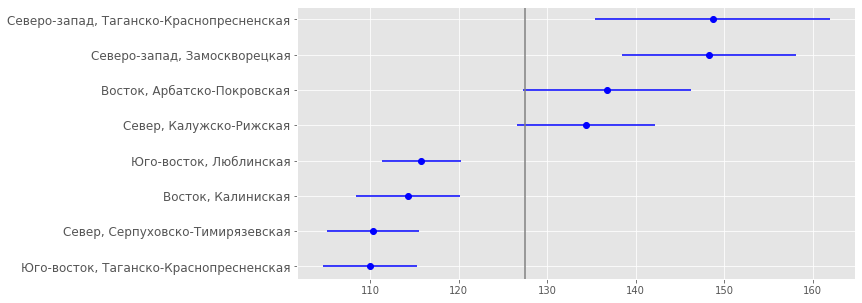

In [34]:
center = df_agg['mean'].values
step = df_agg['step'].values

mu_hat = df.price.mean() # общее среднее 

plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size),  xerr=step, 
             capsize=0, fmt="o", color="blue")

plt.yticks(np.arange(center.size), df_agg.index, fontsize=12);
plt.axvline(mu_hat, 0, color='grey');

__Выводы:__ 

- В среднем, самая дешевая недвижимость находится на Юго-востоке. Самая дорогая на Северо-западе. 

In [35]:
# order = df.dropna().groupby('code')['price'].mean().sort_values().index[::-1]

# sns.barplot(data=df.dropna(), y='code', x='price', orient='h',
#             order=order
#            );

## Д.И. для разности средних

### Ассимптотический

Построим $95\%$ асимптотический доверительный интервал для разницы в средней стоимости квартир в монолитных и панельных домах.

$$
\bar x - \bar y \pm z_{crit} \cdot \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}}
$$

In [36]:
x = df[df.brick == 1].price.values
y = df[df.brick == 0].price.values

diff = x.mean() - y.mean() 
nx, ny = x.size, y.size
diff_sd = ((x.var(ddof=1)/nx) + (y.var(ddof=1)/ny))**0.5

left, right = stats.norm.interval(0.95, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [23.49; 34.36] ширины 10.87


### Точный с одинаковыми дисперсиями

Предположим, что дисперсии неизвестны, но равны.

$$
\bar x - \bar y \pm t_{crit} \cdot \sqrt{\frac{\hat{\sigma}^2}{n_x} + \frac{\hat{\sigma}^2}{n_y}}
$$

где $\hat{\sigma}^{2}$ - объединенная дисперсия:
$$
\hat{\sigma}^{2}=\frac{\left(n_{x}-1\right) \hat{\sigma}_{x}^{2}+\left(n_{y}-1\right) \hat{\sigma}_{y}^{2}}{n_{x}+n_{y}-2}
$$


In [37]:
diff = x.mean() - y.mean()
nx, ny = x.size, y.size

s2 = ((nx - 1)*x.var() + (ny - 1)*y.var())/(nx + ny - 2)
diff_sd = (s2/nx + s2/ny)**0.5

left, right = stats.t.interval(0.95, df=(nx + ny - 2), loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [24.28; 33.58] ширины 9.297


### Точный с различными дисперсиями

Предположим, что дисперсии неизвестны и не равны. Построим приближённый доверительный интервал (интервал Уэлча).


$$
\bar x - \bar y \pm t_{crit}(\nu) \cdot \sqrt{\frac{\hat{\sigma}_x^2}{n_x} + \frac{\hat{\sigma}_y^2}{n_y}}
$$



где $v$ – примерное число степеней свободы:

$$
v=\frac{\left(\dfrac{\hat{\sigma}_{x}^{2}}{n_{x}}+\dfrac{\hat{\sigma}_{y}^{2}}{n_{y}}\right)^{2}}{\dfrac{\hat{\sigma}_{x}^{4}}{n_{x}^{2}\left(n_{x}-1\right)}+\dfrac{\hat{\sigma}_{y}^{4}}{n_{y}^{2}\left(n_{y}-1\right)}}
$$


In [38]:
x.var(), y.var()

(4264.981392232218, 1668.1298841576563)

In [39]:
diff = x.mean() - y.mean()
nx, ny = x.size, y.size

diff_sd = (x.var()/nx + y.var()/ny)**0.5

u = (x.var() / nx + y.var() / ny) ** 2
d = (x.var()**2) / (nx**2 * (nx - 1)) + (y.var()**2)/ (ny**2* (ny - 1))
nu =  u/d 
print("Число степеней свободы:", nu)

left, right = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))


Число степеней свободы: 911.4012642833161
Доверительный интервал [23.49; 34.37] ширины 10.88


In [40]:
nx, ny, nx<ny

(659, 1381, True)

In [41]:
x.std(), y.std(), x.std()<y.std()  # Знаки не в ту сторону => при малых выборках не очень верим

(65.30682500498871, 40.842745796012004, False)

> Все три доверительных интервала из-за больших объёмов выборки снова оказались похожи. Выборочные дисперсии довольно сильно отличаются друг от друга, из-за этого использование доверительного интервала с предпосылкой о их равенстве некорректно.

__Выводы:__ 

- В среднем, на уровне значимости $5\%$, квартиры в монолитных домах стоят дороже, чем в панельных. Ноль нигде не попадает в доверительный интервал.  

## Д.И. для дисперсии

Предполагая нормальность распределения цен, построим $95\%$ доверительный интервал для дисперсии стоимости квартир. 

$$
\frac{(n - 1) \cdot \hat{\sigma}^2}{\chi_{n-1}^2 \left(\frac{\alpha}{2} \right)} \le \sigma^2 \le \frac{(n - 1) \cdot \hat{\sigma}^2}{\chi_{n-1}^2 \left(1 - \frac{\alpha}{2} \right)}
$$


> __Предположения:__ 
Выборка пришла из нормального распределения, математическое ожидание неизвестно, выполняется теорема Фишера


In [42]:
alpha = 0.05 

n = df.price.count()
var_hat = df.price.var(ddof=1)

chi_l, chi_u = stats.chi2.ppf([1-alpha/2, alpha/2], df = n-1)

left = (n-1) * var_hat/chi_l
right = (n-1) * var_hat/chi_u

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}".format(left, right, right - left))


Доверительный интервал [2533.5; 2864.5] ширины 331.01


Сделаем то же самое, но в разбивке по районам. 

In [43]:
df_agg = df.groupby('code')['price'].agg(['var', 'count'])

alpha = 0.05
df_agg['ch_l'] = df_agg['count'].apply(lambda n: stats.chi2.ppf(1-alpha/2, df = n-1))
df_agg['ch_u'] = df_agg['count'].apply(lambda n: stats.chi2.ppf(alpha/2, df = n-1))

df_agg['left'] =  (df_agg['count']-1) * df_agg['var']/df_agg['ch_l']
df_agg['right'] =  (df_agg['count']-1) * df_agg['var']/df_agg['ch_u']

df_agg = df_agg.sort_values('var')
df_agg

,var,count,ch_l,ch_u,left,right
code,,,,,,
"Север, Серпуховско-Тимирязевская",871.338752,215,256.407893,175.378164,727.226026,1063.225252
"Юго-восток, Люблинская",992.721500,336,387.599359,286.187623,858.003747,1162.040827
"Юго-восток, Таганско-Краснопресненская",1087.455800,257,302.211810,213.574668,921.170767,1303.472401
"Восток, Калиниская",1149.040157,226,268.437839,185.348344,963.105785,1394.854843
"Восток, Арбатско-Покровская",2365.777902,180,217.940765,143.844791,1943.070379,2943.966485
"Север, Калужско-Рижская",2462.095507,272,318.493509,227.293087,2094.949704,2935.539707
"Северо-запад, Замоскворецкая",4980.628075,345,397.276692,294.510332,4312.702181,5817.575378
"Северо-запад, Таганско-Краснопресненская",5425.328855,209,249.834911,169.951073,4516.856343,6639.960458


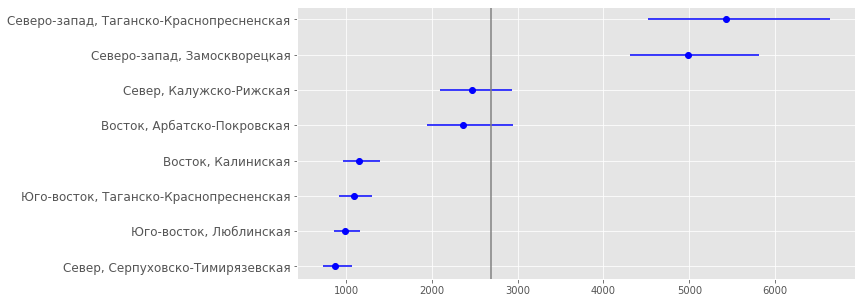

In [44]:
center = df_agg['var'].values
step = np.array([df_agg['var'].values - df_agg['left'].values, 
                 df_agg['right'].values - df_agg['var'].values])

var_hat = df.price.var()

plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size),  xerr = step, 
             capsize=0, fmt="o", color='blue')

# plt.yticks(np.arange(center.size - 1, -1, -1), district, fontsize=12);
# plt.yticks(np.arange(center.size), district, fontsize=12);
plt.yticks(np.arange(center.size), df_agg.index, fontsize=12);
plt.axvline(var_hat, 0, color='grey');

In [45]:
# order = df.dropna().groupby('code')['price'].var().sort_values().index[::-1]

# sns.barplot(data=df.dropna(), y='code', x='price', orient='h',
#             estimator = np.var,
#             order=order
#            );

__Выводы:__ 

- На Юго-Востоке самый большой разброс в ценах. Как покупатель, я найду здесь более разнообразные предложения. Так происходит из-за того, что с одной стороны районы близки к центру и здесь есть респектабельная недвижимость. С другой стороны, в районах довольно много советской застройки с плохой планировкой и ремонтом. 

## Д.И. для отношения дисперсий

Предполагая нормальность распределения, построим $95\%$-ый доверительный интервал для отношения дисперсии стоимости квартир в монолитных домах и в панельных домах. 


$$
\frac{\hat{\sigma}^2_x}{\hat{\sigma}^2_y} \cdot F_{\frac{\alpha}{2}}(n_x-1,n_y-1) \le \frac{\sigma^2_x}{\sigma^2_y} \le  \frac{\hat{\sigma}^2_x}{\hat{\sigma}^2_y} \cdot F_{1 - \frac{\alpha}{2}}(n_x-1,n_y-1)
$$

In [46]:
alpha = 0.05

x = df[df.brick == 1].price.values
y = df[df.brick == 0].price.values

n, m = x.size - 1, y.size - 1
sn, sm = x.var(ddof=1), y.var(ddof=1)

ratio = sm / sn

left = ratio * stats.f(n, m).ppf(alpha/2)
right = ratio * stats.f(n, m).ppf(1 - alpha/2)

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}".format(left, right, right - left))

Доверительный интервал [0.34216; 0.445] ширины 0.10285


In [47]:
ratio

0.3908119125335132

In [48]:
x.std(), y.std()

(65.30682500498871, 40.842745796012004)

__Выводы:__ 

- Единица не попала в доверительный интервал. Дисперсии в ценах на монолитное жильё и на панельное различаются. Цены на кирпичное жильё обладают более высокой дисперсией. 

### Причем тут единица?

In [49]:
ratio = 0.8 # = x.var()/y.var()

[0.7, 0,9] , [0.4, 1.3]

([0.7, 0, 9], [0.4, 1.3])

In [50]:
# если x.var()/y.var() in [0.7, 0,9] => x менее волаитлен по сравнению с y

In [51]:
# если x.var()/y.var() in [0.4, 1) => x менее волаитлен по сравнению с y
# если x.var()/y.var() in (1, 1.3) => y менее волаитлен по сравнению с x

## А можно ли было пользоваться нормальным распределением? 

Распределение цен выглядит не очень нормальным. 

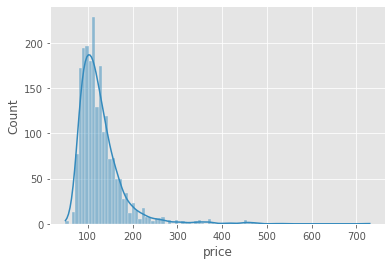

In [52]:
# df.price.hist(bins=80, density=True);
sns.histplot(df['price'], kde=True);

Распределение логарифмов цен оказывается более похожим на нормальное.

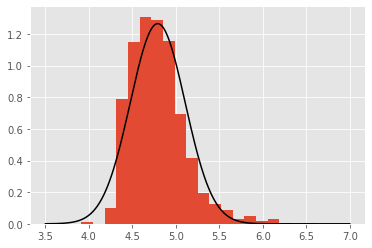

In [53]:
df.price.apply(np.log).hist(bins=20, density=True);

x = df.price.apply(np.log).values

xs = np.linspace(3.5, 7, 300)
ys = stats.norm(loc=np.mean(x), scale=np.std(x, ddof=1)).pdf(xs)
plt.plot(xs, ys, color="black");

Можно формально проверить гипотезу о том, имеет ли какая-то выборка нормальное распределение с помошью теста Колмогорова-Смирнова. О нём мы подробнее поговорим в будущем, а сейчас просто воспользуемся. 

In [54]:
stats.kstest(df.price, 'norm', args=(df.price.mean(), df.price.std(ddof=1)))

KstestResult(statistic=0.1508501598050489, pvalue=5.415515510735646e-41)

In [55]:
stats.kstest(x, 'norm', args=(np.mean(x), np.std(x, ddof=1)))

KstestResult(statistic=0.07697286130504083, pvalue=5.856877429594e-11)

В обоих ситуациях `pvalue` очень низкое, это говорит о том, что выборка не распределена нормально.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/CVZm28V/dog.jpg" alt="dog" border="0"></a>